# Week 3 Data Preperation

## 3.2 Assignment: Using Data to Improve MLB Attendance

### Instructions)

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.

You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to comment all your code and you are documenting your steps, process, and analysis.

### Answer)

When dealing with a brand-new dataset like this, it is best to explore different analytical methods. After looking at the data in Excel, my initial thought is to look at a correlation matrix, descriptive statistics, and ANOVA relationships. I'll explore these three methods first and then look at the distribution of attendance among the different variables.

**Reading and observing the data**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the data
mlb_df = pd.read_csv('C:/Users/ivan2/gitLocal/DSC630-SPRING2024/WK03-dodgers-2022.csv')
mlb_df.head(5)

month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  
0        NO         NO  
1        NO         NO  
2        NO         NO  
3       YES         NO  
4        NO         NO

In [5]:
mlb_df.shape

(81, 12)

In [6]:
mlb_df.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

**Descriptive Statistics**

In [7]:
mlb_df.describe()

day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.000000

**Relationships using Correlation Matrix, for Continous Variables**

In [8]:
correlation_matrix = mlb_df.corr()

correlation_matrix

day    attend      temp
day     1.000000  0.027093 -0.127612
attend  0.027093  1.000000  0.098951
temp   -0.127612  0.098951  1.000000

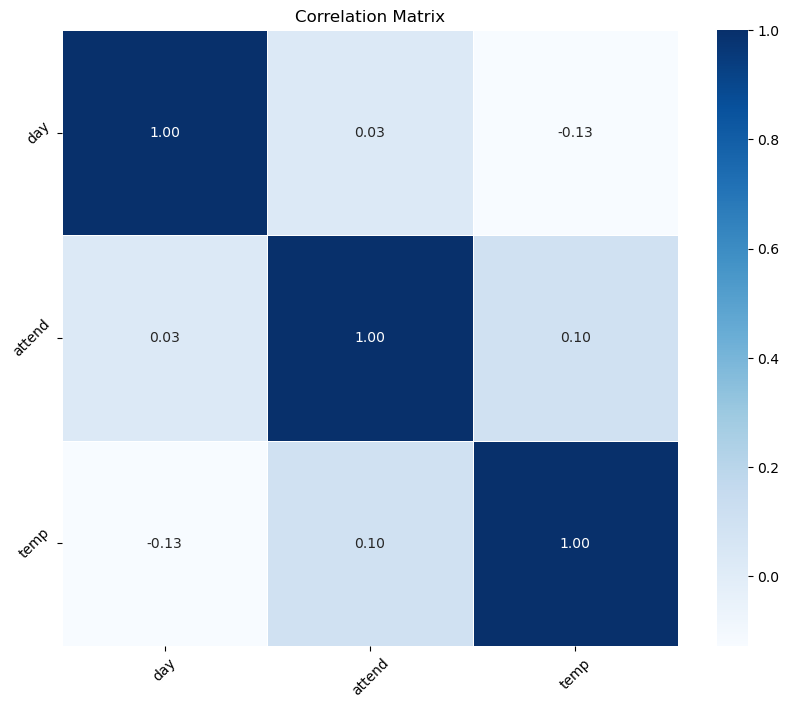

In [9]:
# setting up the figure
plt.figure(figsize=(10, 8))

# applying the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True, linewidths=.5)

# title and labels
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the correlation matrix, we can see that all are weak relationships. Attendance is slightly higher as the temperature rises; however, since the correlation is only 0.1, we should not take this too seriously.

Now we need to observe if any relationships exist between Attendance and the categorical variables. I will do this using ANOVA for multi-value variables and T-tests for binary variables.

**Relationships using ANOVA and T-Tests, for Categorical Variables**

In [10]:
from scipy.stats import f_oneway, ttest_ind

In [35]:
# ANOVA for day_of_week
days = mlb_df['day_of_week'].unique()
attendance_by_day = [mlb_df[mlb_df['day_of_week'] == day]['attend'] for day in days]
anova_day_of_week = f_oneway(*attendance_by_day)

print('F-Statistic:',anova_day_of_week.statistic)
print('P-Value:',anova_day_of_week.pvalue)

F-Statistic: 3.644032326193235
P-Value: 0.003185034232658946


Day of the Week (ANOVA): The p-value is approximately 0.0032, indicating that there are statistically significant differences in attendance across different days of the week. This suggests that the day of the week is correlated with attendance.

In [36]:
# ANOVA for month
months = mlb_df['month'].unique()
attendance_by_month = [mlb_df[mlb_df['month'] == month]['attend'] for month in months]
anova_month = f_oneway(*attendance_by_month)

print('F-Statistic:',anova_month.statistic)
print('P-Value:',anova_month.pvalue)


F-Statistic: 2.567203673835352
P-Value: 0.02584676447086318


Month (ANOVA): The p-value is about 0.0258, which suggests that there are statistically significant differences in attendance across different months, indicating a correlation between the month and attendance.

In [39]:
# ANOVA for 'opponent'
opponents = mlb_df['opponent'].unique()
attendance_by_opponent = [mlb_df[mlb_df['opponent'] == opponent]['attend'] for opponent in opponents]
anova_opponent = f_oneway(*attendance_by_opponent)

print('F-Statistic:',anova_opponent.statistic)
print('P-Value:',anova_opponent.pvalue)

F-Statistic: 1.3759848896865952
P-Value: 0.18253553289949573


Opponent (ANOVA): The p-value is about 0.1825, which suggests that there are is no statistically significant differences in attendance across opponents. However, this is taking into account all opponents, I am sure some rival opponents do yield higher attendance, and we should be able to see that distribution using box plots later on.

In [13]:
# T-tests for binary categorical variables
ttest_results = {}
binary_vars = ['skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']
for var in binary_vars:
    groups = mlb_df[var].unique()
    group1 = mlb_df[mlb_df[var] == groups[0]]['attend']
    group2 = mlb_df[mlb_df[var] == groups[1]]['attend']
    ttest_results[var] = ttest_ind(group1, group2)
    
ttest_results

{'skies': Ttest_indResult(statistic=1.3573489468590318, pvalue=0.17853549139588926),
 'day_night': Ttest_indResult(statistic=0.3873945937448441, pvalue=0.6995058414022302),
 'cap': Ttest_indResult(statistic=0.48961356616462215, pvalue=0.625764198935014),
 'shirt': Ttest_indResult(statistic=-1.1951789203122434, pvalue=0.23559272116450491),
 'fireworks': Ttest_indResult(statistic=-0.01861600697988229, pvalue=0.9851943703995105),
 'bobblehead': Ttest_indResult(statistic=-6.359553539813022, pvalue=1.2169642509120423e-08)}

Binary Categorical Variables (T-tests):

- Skies: The p-value is 0.1785, indicating that there's no statistically significant difference in attendance between clear and cloudy skies.
- Day/Night: The p-value is 0.6995, suggesting no significant difference in attendance between day and night games.
- Cap and Shirt Promotions: The p-values for cap and shirt promotions are 0.6258 and 0.2356, respectively, indicating no significant differences in attendance related to these promotions.
- Fireworks: The p-value is 0.9852, showing no significant difference in attendance for games with or without fireworks.
- Bobblehead: The p-value is very small, indicating a highly significant difference in attendance for games with bobblehead promotions compared to those without.

Out of all of the categorical variables, it looks like Booblehead promotions is the only variable that has a statistically significant correlation with attendance.

**Distributions**

Now we will see the distribution Attendance for some of these variables and see what insight we can gain from the distributions now nowing the relationships. 

In [14]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

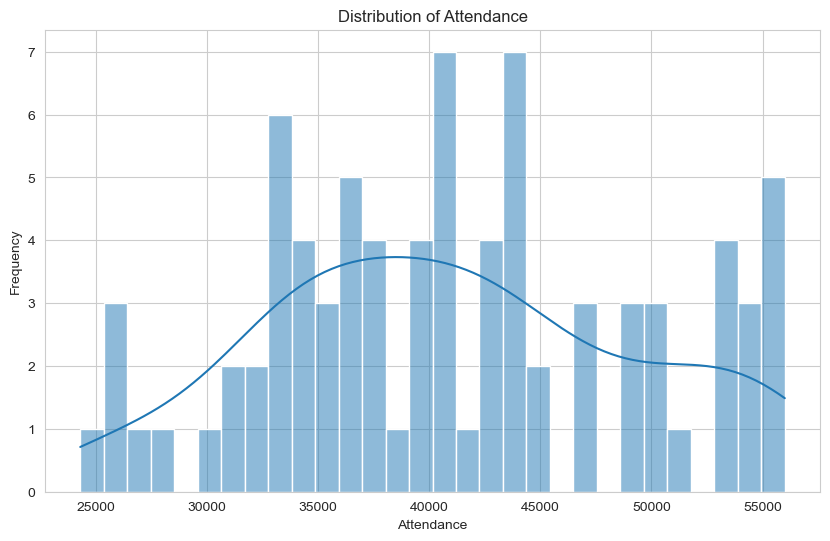

In [15]:
# Overview of attendance distribution
plt.figure(figsize=(10, 6))
sns.histplot(mlb_df['attend'], bins=30, kde=True)
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

The distribution of attendance appears to normally distributed.

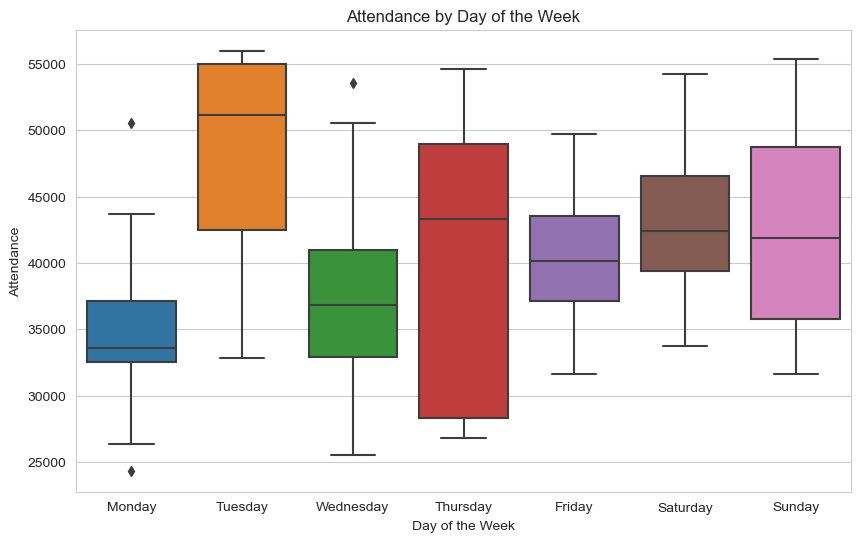

In [16]:
# Attendance by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='attend', data=mlb_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.show()

We know that Day of Week is statistically significantly correlated with attendance. Now we can observe in the distribution that Tuesday is the highest day in attendance, followed by days closer to the weekend, Thu-Sun.

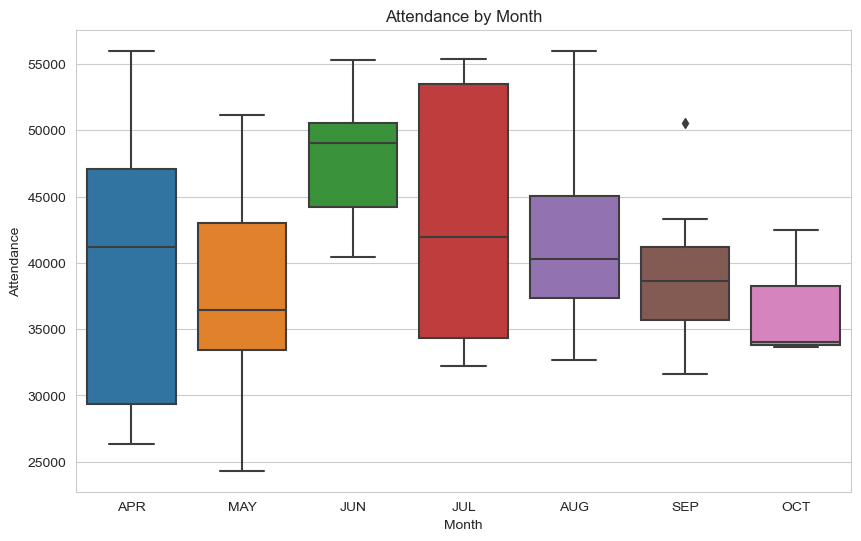

In [17]:
# Attendance by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='attend', data=mlb_df, order=['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'])
plt.title('Attendance by Month')
plt.xlabel('Month')
plt.ylabel('Attendance')
plt.show()

Month also has a stitistically significant correlation with attendance, with the Summer months of June and July having highest attendance.

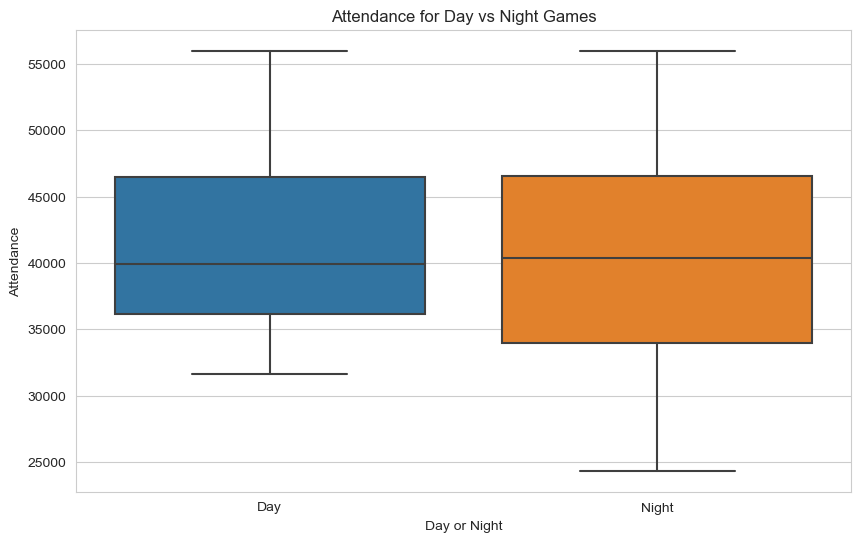

In [18]:
# Attendance for Day vs Night games
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_night', y='attend', data=mlb_df)
plt.title('Attendance for Day vs Night Games')
plt.xlabel('Day or Night')
plt.ylabel('Attendance')
plt.show()

Night games tend to attract slightly higher attendance compared to day games. This could be due to the cooler temperatures in the evening or people's availability after work hours. However, we know that this is not statistically significant.

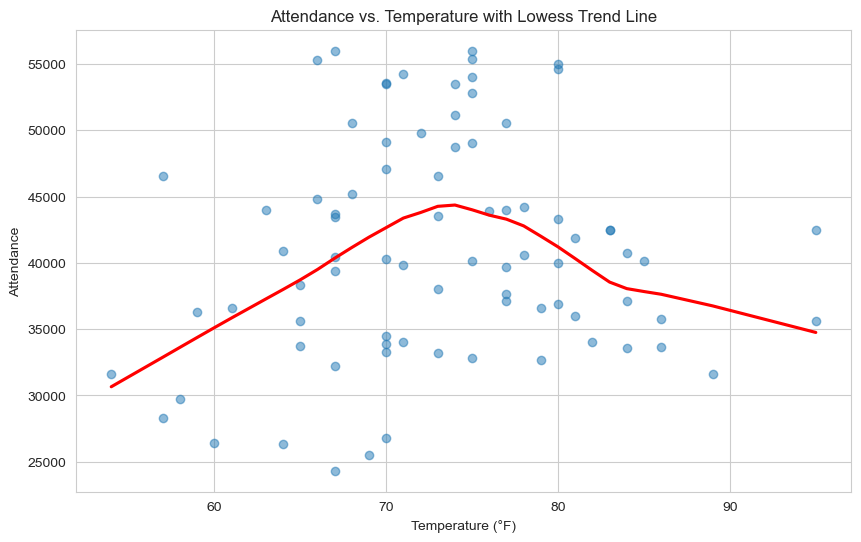

In [20]:
# impact of temperature on attendance with a Lowess line for non-linear trends
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='attend', data=mlb_df, scatter_kws={'alpha':0.5}, lowess=True, line_kws={'color': 'red'})
plt.title('Attendance vs. Temperature with Lowess Trend Line')
plt.xlabel('Temperature (Â°F)')
plt.ylabel('Attendance')
plt.show()

Temperature had a weak positive correlation with attendance, and we can now see that this is because attendance increases as temperature rises to a certain point. After about 80 degrees, attendance begins to decline. This shows us that attendance is at its highest when the tempereate is between 65 and 80 degrees.

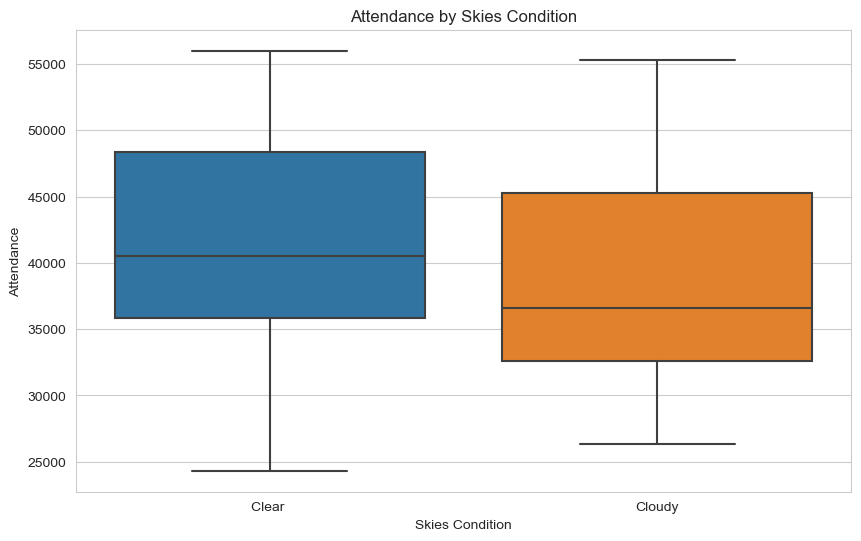

In [21]:
# impact of skies condition on attendance
plt.figure(figsize=(10, 6))
sns.boxplot(x='skies', y='attend', data=mlb_df)
plt.title('Attendance by Skies Condition')
plt.xlabel('Skies Condition')
plt.ylabel('Attendance')
plt.show()

We also see that clear skies tend to yield higher attendance. This is most likely a mute point since management will not know the forecast of the day when they are planning their game schedules.

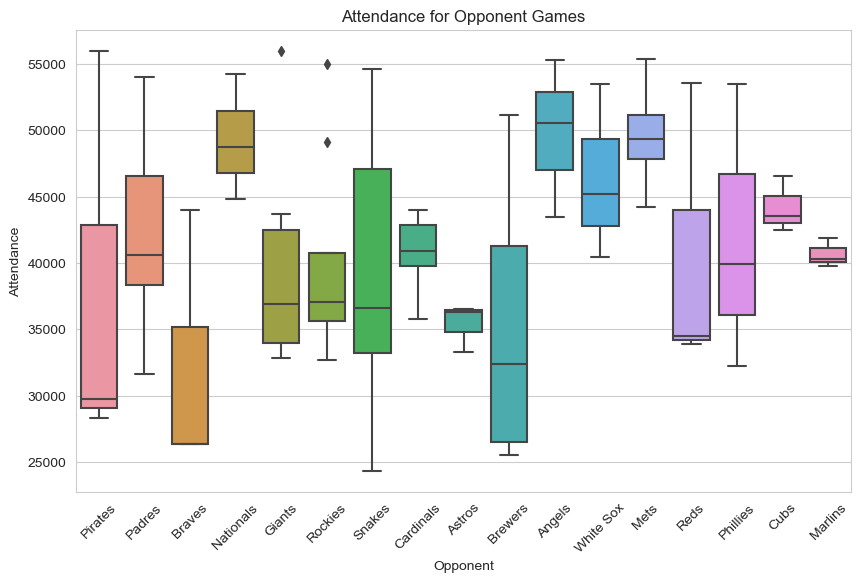

In [38]:
# Attendance for opponent
plt.figure(figsize=(10, 6))
sns.boxplot(x='opponent', y='attend', data=mlb_df)
plt.title('Attendance for Opponent Games')
plt.xlabel('Opponent')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

We previously observed a non-significant relationship between Opponent and Attendance, however here we see that there are a few key apponents that tend to regularly yield high attendance numbers.

- Nationals
- Angels
- White Sox
- Mets

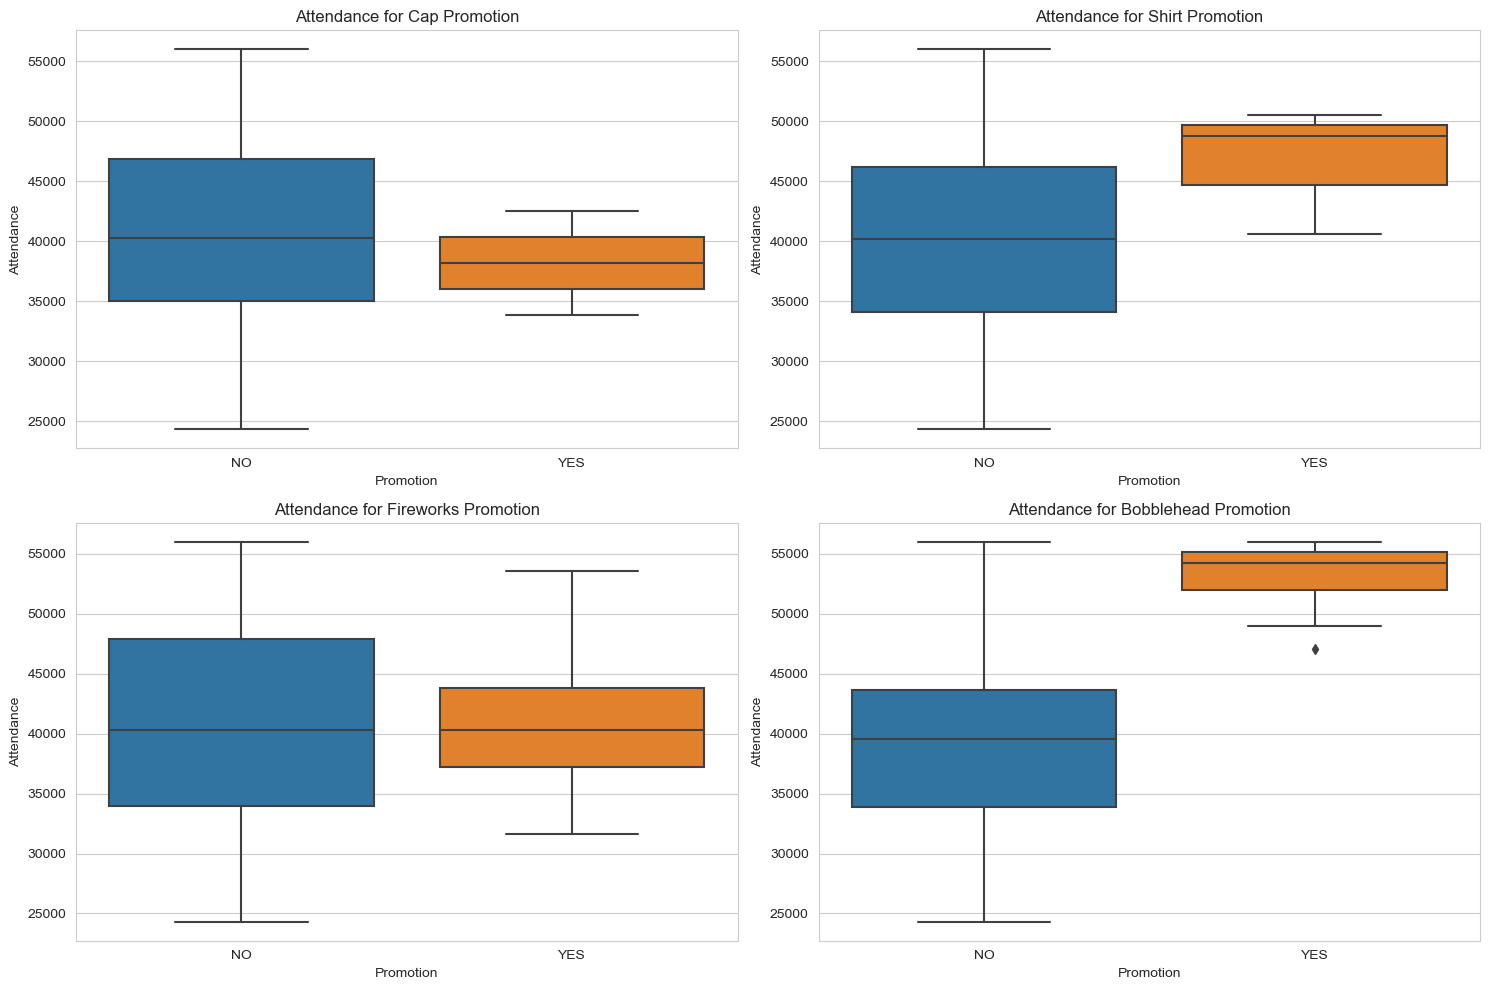

In [22]:
# analyzing the impact of promotional items on attendance
promotions = ['cap', 'shirt', 'fireworks', 'bobblehead']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, promo in enumerate(promotions):
    row = i // 2
    col = i % 2
    sns.boxplot(x=promo, y='attend', data=mlb_df, ax=axs[row, col])
    axs[row, col].set_title(f'Attendance for {promo.title()} Promotion')
    axs[row, col].set_xlabel('Promotion')
    axs[row, col].set_ylabel('Attendance')

plt.tight_layout()
plt.show()

In these box plots we can see that the primary items that bring people to the games are Shirt Promotions and Bobblehead Promotions. 

Shirt promotions were not statistically significant, but with a p-value of .21 they still do have some impact on attendance, and that can be seen in the distribution.

Boobleheads do make a positive statistically significatn difference, and it is very evident in the distribution.

### Conclusion

**Summary:**

There is a significant correlation between attendance and the day of the week, with some days attracting more attendees than others.
The month also shows a significant correlation with attendance, suggesting that attendance varies seasonally.

Among the promotional items, bobbleheads stand out as having a highly significant positive correlation with attendance, confirming their effectiveness in attracting larger crowds.

Based on these findings, management should consider the timing of games and focus promotional efforts, especially on bobbleheads, to improve attendance. Additionally, while the day/night distinction and skies condition don't show a significant direct correlation with attendance, they may still influence the overall game day experience and should be considered in the broader context of game scheduling and marketing strategies.

Suppose management wished to break an attendance record. In that case, I recommend scheduling a game with the Nationals, Angels, White Sox, or Mets during a Tuesday Night in June or July and running a Bobbleheads promotion.